### Hierarchial Clustering

#### Import library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

#### Import dataset

In [2]:
df = pd.read_csv('Mall_Customers.csv')
df.drop(columns=['CustomerID', 'Genre', 'Age'], inplace=True) #
df.rename(columns={'Annual Income (k$)': 'Annual_Income', 'Spending Score (1-100)':'Spending_Score'}, inplace=True)
df

,Annual_Income,Spending_Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


#### Create Dummy Variables

In [15]:
X = pd.get_dummies(df) #no need to drop first for multicoliniarity
#X  #there weren't any

#### Feature Scaling (Standard Scaler)

In [4]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_X = scaler.fit_transform(X)
scaled_X[0:3]

array([[0.        , 0.3877551 ],
       [0.        , 0.81632653],
       [0.00819672, 0.05102041]])

#### FIT & PREDICT the model

In [8]:
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(n_clusters = 4)
cluster_labels = model.fit_predict(scaled_X)

#### Visualize

<AxesSubplot:xlabel='Annual_Income', ylabel='Spending_Score'>

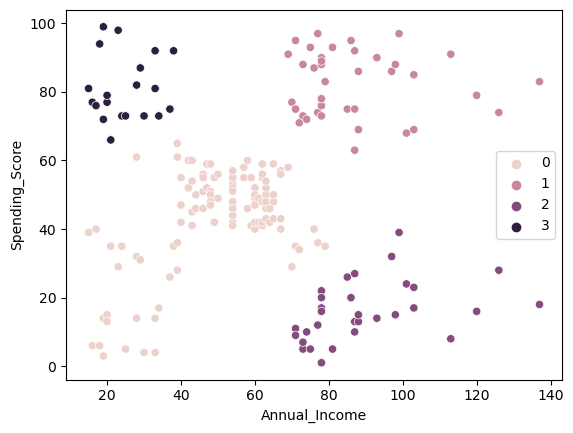

In [10]:
sns.scatterplot(data=df, x='Annual_Income', y='Spending_Score', hue=cluster_labels)

In [12]:
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster import hierarchy

linkage_matrix = hierarchy.linkage(model.children_)
linkage_matrix[0:3]

array([[ 7.        , 61.        ,  1.41421356,  2.        ],
       [ 9.        , 34.        ,  1.41421356,  2.        ],
       [27.        , 38.        ,  1.41421356,  2.        ]])

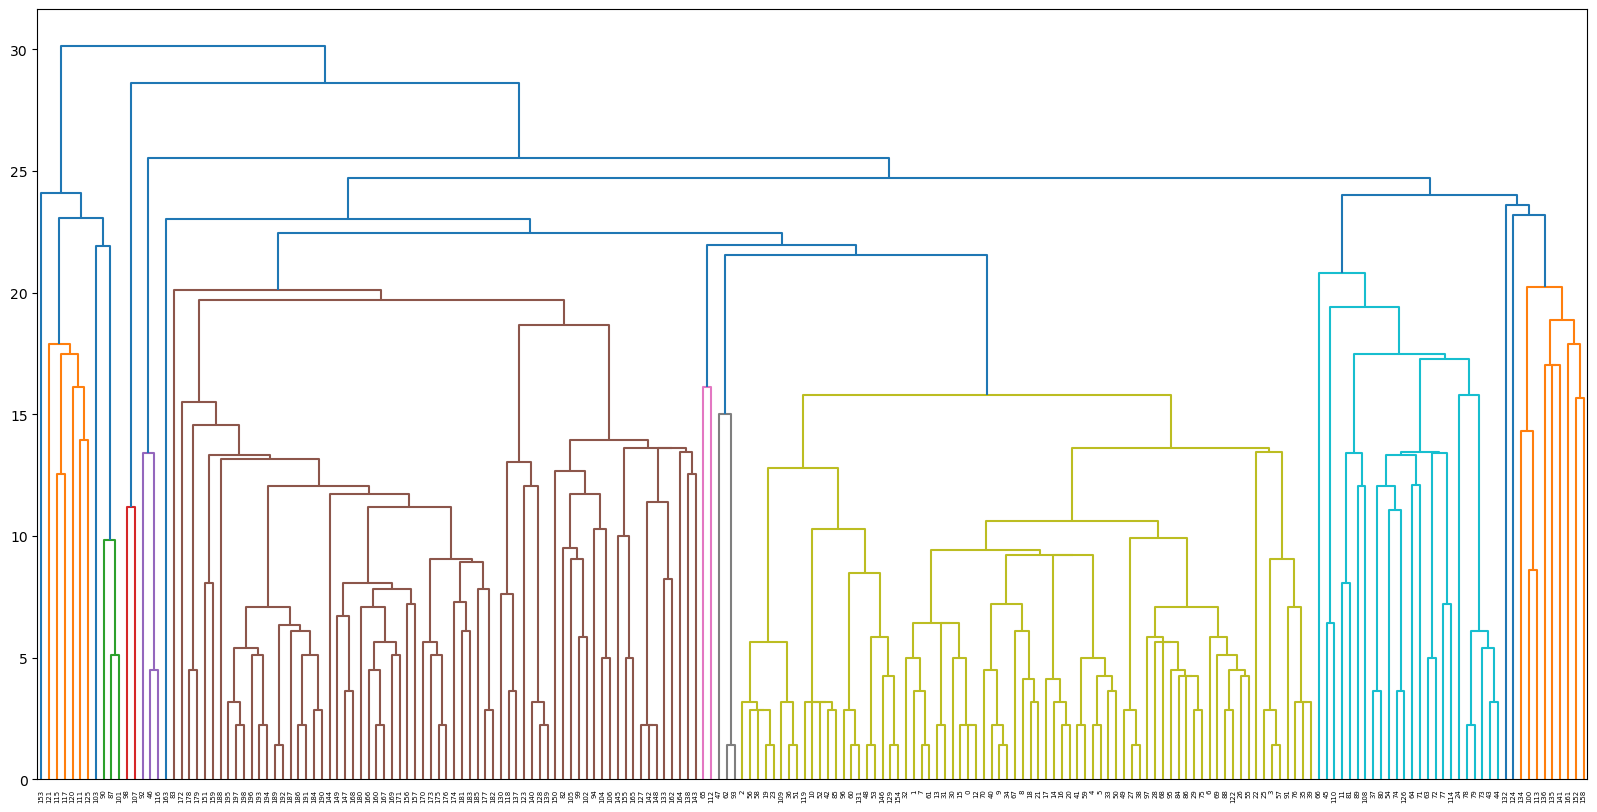

In [13]:
plt.figure(figsize=(20, 10))
dendro = dendrogram(linkage_matrix)  #, truncate_mode='lastp', p=10

In [14]:
# I need more different examples to understand Clustering